[*********************100%***********************]  6 of 6 completed


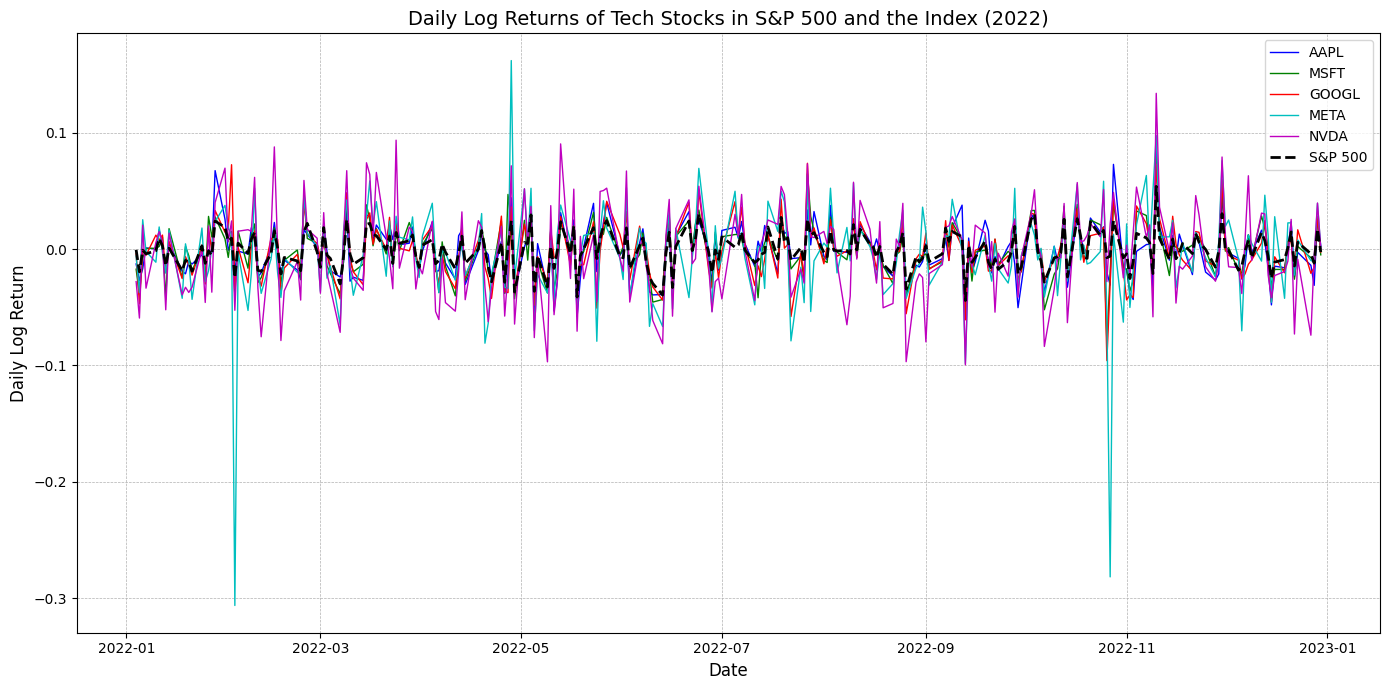

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# List of tech stocks in the S&P 500 (first 5)
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'META', 'NVDA']
spx = '^GSPC'  # S&P 500 index symbol
# Fetch historical data for each stock and the index
data = yf.download(tech_stocks + [spx], start='2022-01-01', end='2022-12-31')['Adj Close']
# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()
# Plot the data
plt.figure(figsize=(14, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'k']  # Define a list of colors for the lines
for i, stock in enumerate(tech_stocks):
    plt.plot(log_returns[stock], label=stock, color=colors[i], linestyle='-', linewidth=1)
plt.plot(log_returns[spx], label='S&P 500', color='black', linestyle='--', linewidth=2)

# Customize the plot
plt.title('Daily Log Returns of Tech Stocks in S&P 500 and the Index (2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Log Return', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Correlation: 0.9203694042986003


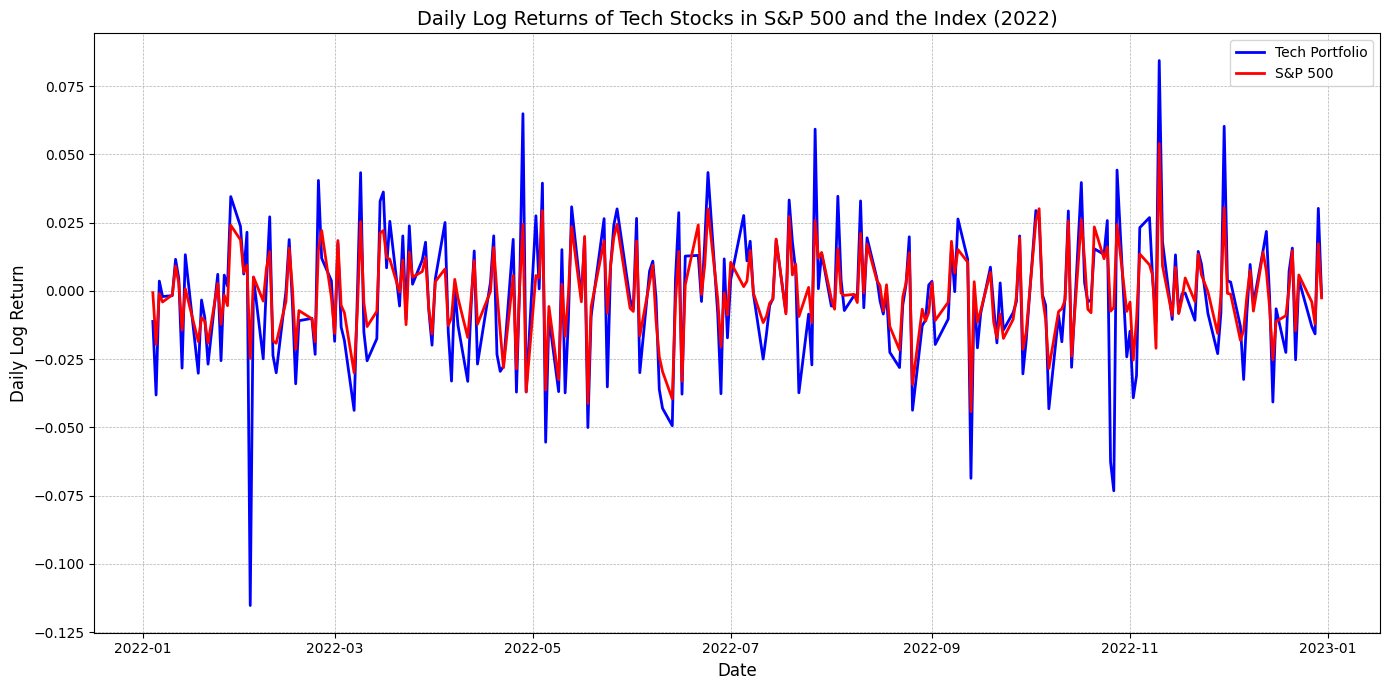

In [29]:
# Calculate the weighted average price of the 5 stocks (equal weighting)
weights = np.array([0.2] * 5)
portfolio = data[tech_stocks].dot(weights)
# Add the portfolio to the data DataFrame
data['Tech Portfolio'] = portfolio
# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()
# Calculate correlation using stats library
portfolio_correlation, p_value = stats.pearsonr(data['Tech Portfolio'], data[spx])
print('Correlation:', portfolio_correlation)
# Plot the data
plt.figure(figsize=(14, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'k']  # Define a list of colors for the lines
plt.plot(log_returns['Tech Portfolio'], label='Tech Portfolio', color='blue', linestyle='-', linewidth=2)
plt.plot(log_returns[spx], label='S&P 500', color='red', linestyle='-', linewidth=2)
# Customize the plot
plt.title('Daily Log Returns of Tech Stocks in S&P 500 and the Index (2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Log Return', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [52]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices


# Define the independent variable (portfolio) and the dependent variable (spx)
X = data['Tech Portfolio']
y = data['^GSPC']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create the linear model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the summary of the model
print(results.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject